In [2]:
from datasets import get_dataset_config_names

options = get_dataset_config_names("subjqa", trust_remote_code=True)
options

['books', 'electronics', 'grocery', 'movies', 'restaurants', 'tripadvisor']

In [3]:
from datasets import load_dataset

dataset = load_dataset("subjqa", name="electronics")

print(dataset)

DatasetDict({
    train: Dataset({
        features: ['domain', 'nn_mod', 'nn_asp', 'query_mod', 'query_asp', 'q_reviews_id', 'question_subj_level', 'ques_subj_score', 'is_ques_subjective', 'review_id', 'id', 'title', 'context', 'question', 'answers'],
        num_rows: 1295
    })
    test: Dataset({
        features: ['domain', 'nn_mod', 'nn_asp', 'query_mod', 'query_asp', 'q_reviews_id', 'question_subj_level', 'ques_subj_score', 'is_ques_subjective', 'review_id', 'id', 'title', 'context', 'question', 'answers'],
        num_rows: 358
    })
    validation: Dataset({
        features: ['domain', 'nn_mod', 'nn_asp', 'query_mod', 'query_asp', 'q_reviews_id', 'question_subj_level', 'ques_subj_score', 'is_ques_subjective', 'review_id', 'id', 'title', 'context', 'question', 'answers'],
        num_rows: 255
    })
})


In [4]:
dataset["train"]["answers"][1]

{'text': ['Bass is weak as expected',
  'Bass is weak as expected, even with EQ adjusted up'],
 'answer_start': [1302, 1302],
 'answer_subj_level': [1, 1],
 'ans_subj_score': [0.5083333253860474, 0.5083333253860474],
 'is_ans_subjective': [True, True]}

In [5]:
import pandas as pd

dfs = {split: dset.to_pandas() for split, dset in dataset.flatten().items()}

for split, df in dfs.items():
    print(f"Number of questions in {split}: {df['id'].nunique()}")

Number of questions in train: 1295
Number of questions in test: 358
Number of questions in validation: 255


In [6]:
dfs["train"].describe()

,question_subj_level,ques_subj_score
count,1295.000000,1295.000000
mean,1.991506,0.169491
std,1.486390,0.270975
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,2.000000,0.400000
max,5.000000,1.000000


In [7]:
dfs["train"].head()

,domain,nn_mod,nn_asp,query_mod,query_asp,q_reviews_id,question_subj_level,ques_subj_score,is_ques_subjective,review_id,id,title,context,question,answers.text,answers.answer_start,answers.answer_subj_level,answers.ans_subj_score,answers.is_ans_subjective
0,electronics,great,bass response,excellent,bass,0514ee34b672623dff659334a25b599b,5,0.50,False,882b1e2745a4779c8f17b3d4406b91c7,2543d296da9766d8d17d040ecc781699,B00001P4ZH,"I have had Koss headphones in the past, Pro 4A...",How is the bass?,[],[],[],[],[]
1,electronics,harsh,high,not strong,bass,7c46670208f7bf5497480fbdbb44561a,1,0.50,False,ce76793f036494eabe07b33a9a67288a,d476830bf9282e2b9033e2bb44bbb995,B00001P4ZH,To anyone who hasn't tried all the various typ...,Is this music song have a goo bass?,"[Bass is weak as expected, Bass is weak as exp...","[1302, 1302]","[1, 1]","[0.5083333, 0.5083333]","[True, True]"
2,electronics,neutral,sound,present,bass,8fbf26792c438aa83178c2d507af5d77,1,0.50,False,d040f2713caa2aff0ce95affb40e12c2,455575557886d6dfeea5aa19577e5de4,B00001P4ZH,I have had many sub-$100 headphones from $5 Pa...,How is the bass?,[The only fault in the sound is the bass],[650],[2],[0.6333333],[True]
3,electronics,muddy,bass,awesome,bass,9876fd06ed8f075fcad70d1e30e7e8be,1,0.50,False,043e7162df91f6ea916c790c8a6f6b22,6895a59b470d8feee0f39da6c53a92e5,B00001WRSJ,My sister's Bose headphones finally died and s...,How is the audio bass?,[the best of all of them],[1609],[1],[0.3],[False]
4,electronics,perfect,bass,incredible,sound,16506b53e2d4c2b6a65881d9462256c2,1,0.65,True,29ccd7e690050e2951be49289e915382,7a2173c502da97c5bd5950eae7cd7430,B00001WRSJ,Wow. Just wow. I'm a 22 yr old with a crazy ob...,Why do I have an incredible sound?,"[The sound is so crisp, crazy obsession with s...","[141, 38]","[1, 1]","[0.40833333, 0.40833333]","[False, False]"


In [8]:
column_names = dfs["train"].columns.tolist()
column_names

['domain',
 'nn_mod',
 'nn_asp',
 'query_mod',
 'query_asp',
 'q_reviews_id',
 'question_subj_level',
 'ques_subj_score',
 'is_ques_subjective',
 'review_id',
 'id',
 'title',
 'context',
 'question',
 'answers.text',
 'answers.answer_start',
 'answers.answer_subj_level',
 'answers.ans_subj_score',
 'answers.is_ans_subjective']

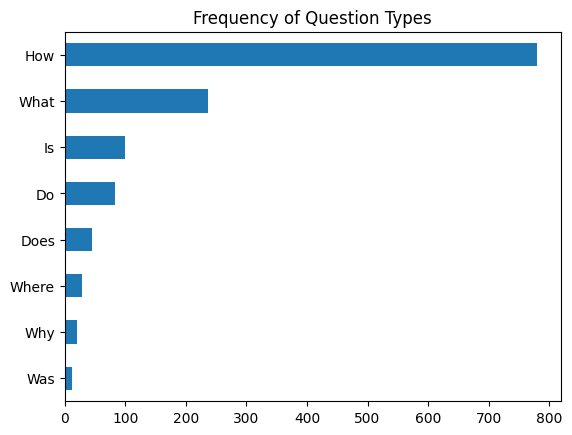

In [9]:
import matplotlib.pyplot as plt

counts = {}
question_types = ["What", "How", "Is", "Does", "Do", "Was", "Where", "Why"]

for q in question_types:
    counts[q] = dfs["train"]["question"].str.startswith(q).value_counts()[True]

pd.Series(counts).sort_values().plot.barh()
plt.title("Frequency of Question Types")
plt.show()

##### Go to HF model hub, select QA and search for SQUAD

In [10]:
from transformers import AutoTokenizer

model_ckpt = "deepset/roberta-base-squad2"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt, trust_remote_code=True)

/home/sercan/anaconda3/envs/pytorch-environment/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [11]:
question = "How much music can this hold?"
context = "An MP3 is about 1 MB/minute, so about 6000 hours depending on file size."
inputs = tokenizer(question, context, return_tensors="pt")

inputs

{'input_ids': tensor([[    0,  6179,   203,   930,    64,    42,   946,   116,     2,     2,
          4688,  3957,   246,    16,    59,   112, 17025,    73,  4530,     6,
            98,    59, 36300,   722,  6122,    15,  2870,  1836,     4,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1]])}

In [12]:
print(tokenizer.decode(inputs["input_ids"][0]))

<s>How much music can this hold?</s></s>An MP3 is about 1 MB/minute, so about 6000 hours depending on file size.</s>


In [13]:
import torch
from transformers import AutoModelForQuestionAnswering

model = AutoModelForQuestionAnswering.from_pretrained(model_ckpt, trust_remote_code=True)

with torch.no_grad():
    outputs = model(input_ids= inputs["input_ids"], attention_mask= inputs["attention_mask"])
print(outputs)

QuestionAnsweringModelOutput(loss=None, start_logits=tensor([[ 1.1276, -8.1721, -8.4530, -7.9752, -8.5254, -8.6735, -8.0572, -9.5367,
         -9.3867, -8.4349,  0.9319,  0.8909, -5.2955, -2.7966,  2.0575,  3.4133,
         -1.2010, -4.3265, -3.2173, -5.5264, -1.5662,  1.4979,  2.3764, -2.6608,
         -3.6962, -7.0487, -3.4080, -5.4748, -4.6754, -8.8369]]), end_logits=tensor([[ 1.4499, -7.7060, -6.7904, -6.1389, -7.5058, -7.3799, -6.7995, -6.7666,
         -7.4103, -6.0500, -4.6616, -4.7859,  1.4522, -4.2961, -2.7452, -1.4223,
          0.2536, -0.7084,  4.0795, -0.3075, -4.6912, -3.9767,  0.0340,  3.1081,
         -3.2529, -4.7419, -3.2038,  1.0621,  0.9285, -7.0004]]), hidden_states=None, attentions=None)


In [14]:
answer = tokenizer.decode(inputs["input_ids"][0])
answer

'<s>How much music can this hold?</s></s>An MP3 is about 1 MB/minute, so about 6000 hours depending on file size.</s>'

In [15]:
import re

def find_all(string, substring):
    """Returns a list of all indices where 'substring' occurs in 'string'."""
    length = len(substring)
    indexes = []
    start = 0

    while start < len(string):
        start = string.find(substring, start)
        if start == -1:
            break
        indexes.append(start)
        start += length  # Use 'start += 1' to find overlapping matches

    return indexes

In [16]:
start_token = "<s>"
end_token = "</s>"

start_indexes = find_all(answer, start_token)
end_indexes = find_all(answer, end_token)

start_indexes, end_indexes

([0], [32, 36, 112])

In [17]:
start_token_encoded = tokenizer.encode(start_token)
end_token_encoded = tokenizer.encode(end_token)

start_token_encoded, end_token_encoded

([0, 0, 2], [0, 2, 2])

In [18]:
inputs["input_ids"][0]

tensor([    0,  6179,   203,   930,    64,    42,   946,   116,     2,     2,
         4688,  3957,   246,    16,    59,   112, 17025,    73,  4530,     6,
           98,    59, 36300,   722,  6122,    15,  2870,  1836,     4,     2])

In [19]:
question_end_idx = None
for index, element in enumerate(inputs["input_ids"][0]):
    if element.item() == 2:
        question_end_idx = index
        break

print(question_end_idx)
answer_start_index = question_end_idx + 2

question_encoded = inputs["input_ids"][0][1:question_end_idx]
answer_encoded = inputs["input_ids"][0][answer_start_index:-1]

question_decoded = tokenizer.decode(question_encoded)
answer_decoded = tokenizer.decode(answer_encoded)
print(f"Question: {question_decoded}")
print(f"Answer: {answer_decoded}")

8
Question: How much music can this hold?
Answer: An MP3 is about 1 MB/minute, so about 6000 hours depending on file size.


In [20]:
from transformers import pipeline

pipe = pipeline("question-answering", model=model, tokenizer=tokenizer)
pipe(question=question_decoded, context=context, top_k=3)

[{'score': 0.2898443639278412,
  'start': 16,
  'end': 27,
  'answer': '1 MB/minute'},
 {'score': 0.10971593856811523,
  'start': 16,
  'end': 48,
  'answer': '1 MB/minute, so about 6000 hours'},
 {'score': 0.07470740377902985,
  'start': 10,
  'end': 27,
  'answer': 'about 1 MB/minute'}]

In [21]:
model.config

RobertaConfig {
  "_name_or_path": "deepset/roberta-base-squad2",
  "architectures": [
    "RobertaForQuestionAnswering"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "language": "english",
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "name": "Roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "transformers_version": "4.39.3",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}

In [22]:
example = dfs["train"].iloc[0][["question", "context"]]
tokenized_example = tokenizer(example["question"], example["context"],
                              return_overflowing_tokens=True, max_length=100,
                              stride=25, truncation=True)

In [23]:
for idx, window in enumerate(tokenized_example["input_ids"]):
    print(f"Window #{idx} has {len(window)} tokens")

Window #0 has 100 tokens
Window #1 has 95 tokens


In [24]:
for window in tokenized_example["input_ids"]:
    print(f"{tokenizer.decode(window)} \n")

<s>How is the bass?</s></s>I have had Koss headphones in the past, Pro 4AA and QZ-99.  The Koss Portapro is portable AND has great bass response.  The work great with my Android phone and can be "rolled up" to be carried in my motorcycle jacket or computer bag without getting crunched.  They are very light and do not feel heavy or bear down on your ears even after listening to music with them on all day</s> 

<s>How is the bass?</s></s> They are very light and do not feel heavy or bear down on your ears even after listening to music with them on all day.  The sound is night and day better than any ear-bud could be and are almost as good as the Pro 4AA.  They are "open air" headphones so you cannot match the bass to the sealed types, but it comes close. For $32, you cannot go wrong.</s> 



In [25]:
# url = """https://artifacts.elastic.co/downloads/elasticsearch/\
# elasticsearch-7.9.2-linux-x86_64.tar.gz"""
# !wget -nc -q {url}
# !tar -xzf elasticsearch-7.9.2-linux-x86_64.tar.gz

In [26]:
# import os
# from subprocess import Popen, PIPE, STDOUT

# # Run Elasticsearch as a background process
# !chown -R daemon:daemon elasticsearch-7.9.2
# es_server = Popen(args=['/home/sercan/Documents/Software/elasticsearch-7.9.2/bin/elasticsearch'],
#                   stdout=PIPE, stderr=STDOUT)
# # Wait until Elasticsearch has started
# !sleep 30

## Burası önemli!!!
## ./bin/elasticsearch -E xpack.security.enabled=false !!!

In [27]:
!curl -X GET "localhost:9200/?pretty"

{
  "name" : "sercan-ROG-Strix-G834JY-G834JY",
  "cluster_name" : "elasticsearch",
  "cluster_uuid" : "wPQC5DiDQM2jTM2rsxqEfg",
  "version" : {
    "number" : "8.14.1",
    "build_flavor" : "default",
    "build_type" : "tar",
    "build_hash" : "93a57a1a76f556d8aee6a90d1a95b06187501310",
    "build_date" : "2024-06-10T23:35:17.114581191Z",
    "build_snapshot" : false,
    "lucene_version" : "9.10.0",
    "minimum_wire_compatibility_version" : "7.17.0",
    "minimum_index_compatibility_version" : "7.0.0"
  },
  "tagline" : "You Know, for Search"
}


In [28]:
from haystack.document_stores.elasticsearch import ElasticsearchDocumentStore

# Return the document embedding for later use with dense retriever 
document_store = ElasticsearchDocumentStore(return_embedding=True)
    

In [29]:
for split, df in dfs.items():
    # Exclude duplicate reviews
    docs = [{"content": row["context"], "id": row["review_id"],
             "meta":{"item_id": row["title"], "question_id": row["id"], 
                     "split": split}} 
        for _,row in df.drop_duplicates(subset="context").iterrows()]
    document_store.write_documents(documents=docs)
    
print(f"Loaded {document_store.get_document_count()} documents")

Loaded 1615 documents


In [30]:
from haystack.nodes.retriever import BM25Retriever

bm25_retriever = BM25Retriever(document_store=document_store)

In [31]:
item_id = "B0074BW614"
query = "Is it good for reading?"
retrieved_docs = bm25_retriever.retrieve(
    query=query, top_k=3, filters={"item_id":[item_id], "split":["train"]})

In [32]:
print(retrieved_docs[0])

<Document: id=4a6aa9c7808ebba8d35aeecbcc3c30fe, content='This is a gift to myself.  I have been a kindle user for 4 years and this is my third one.  I never ...'>


In [33]:
from haystack.nodes import FARMReader

max_seq_length, doc_stride = 384, 128
reader = FARMReader(model_name_or_path=model_ckpt, progress_bar=False,
                    max_seq_len=max_seq_length, doc_stride=doc_stride, 
                    return_no_answer=True)

/home/sercan/anaconda3/envs/pytorch-environment/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [35]:
print(reader.predict_on_texts(question=question, texts=[context], top_k=1))

{'query': 'How much music can this hold?', 'no_ans_gap': 4.915365695953369, 'answers': [<Answer {'answer': '', 'type': 'extractive', 'score': 0.5798550296493893, 'context': None, 'offsets_in_document': [{'start': 0, 'end': 0}], 'offsets_in_context': [{'start': 0, 'end': 0}], 'document_ids': None, 'meta': {}}>]}


In [37]:
from haystack.pipelines import ExtractiveQAPipeline

pipe = ExtractiveQAPipeline(reader=reader, retriever=bm25_retriever)

In [41]:
n_answers = 3
query = "Is it good for reading?"
preds = pipe.run(query=query, params={"Retriever": {"top_k": 3, "filters":{"item_id": [item_id], "split":["train"]}}, 
                                      "Reader": {"top_k": n_answers}})

print(f"Question: {preds['query']} \n")

for idx in range(n_answers):
    print(f"Answer {idx+1}: {preds['answers'][idx].answer}")
    print(f"Review snippet: ...{preds['answers'][idx].context}...")
    print("\n\n")

Question: Is it good for reading? 

Answer 1: 
Review snippet: ...None...



Answer 2: it is great for reading books
Review snippet: ...myself after becoming addicted to hers! Our son LOVES it and it is great for reading books when no light is available. Amazing sound but I suggest goo...



Answer 3: It's light enough that I can hold it to read, but the larger screen compared to the Kindle makes for easier reading
Review snippet: ...t perfect for me. It's light enough that I can hold it to read, but the larger screen compared to the Kindle makes for easier reading. I love the colo...



